In [1]:
import json

annotations_path = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/vessels/annotations/'
train_path = annotations_path + 'train.json'
val_path = annotations_path + 'val.json'
test_path = annotations_path + 'test.json'

# read json file
with open(train_path) as f:
    train = json.load(f)
with open(val_path) as f:
    val = json.load(f)
with open(test_path) as f:
    test = json.load(f)


In [17]:
# gather statistics from this:
heights = [x['height'] for x in train['images']]
widths = [x['width'] for x in train['images']]
# bboxes
bboxes = [x['bbox'] for x in train['annotations']]



In [35]:
print('Num of images train: ', len(train['images']))
print('Num of images val: ', len(val['images']))
print('Num of images test: ', len(test['images']))

print('Num of annotations train: ', len(train['annotations']))
print('Num of annotations val: ', len(val['annotations']))
print('Num of annotations test: ', len(test['annotations']))

Num of images train:  105
Num of images val:  27
Num of images test:  34
Num of annotations train:  483
Num of annotations val:  119
Num of annotations test:  93


In [27]:
print('Mean width: ', sum(widths)/len(widths))
print('Mean height: ', sum(heights)/len(heights))

Mean width:  2588.9714285714285
Mean height:  1669.4476190476191


In [19]:
print(max(heights))
print(max(widths))

1682
2592


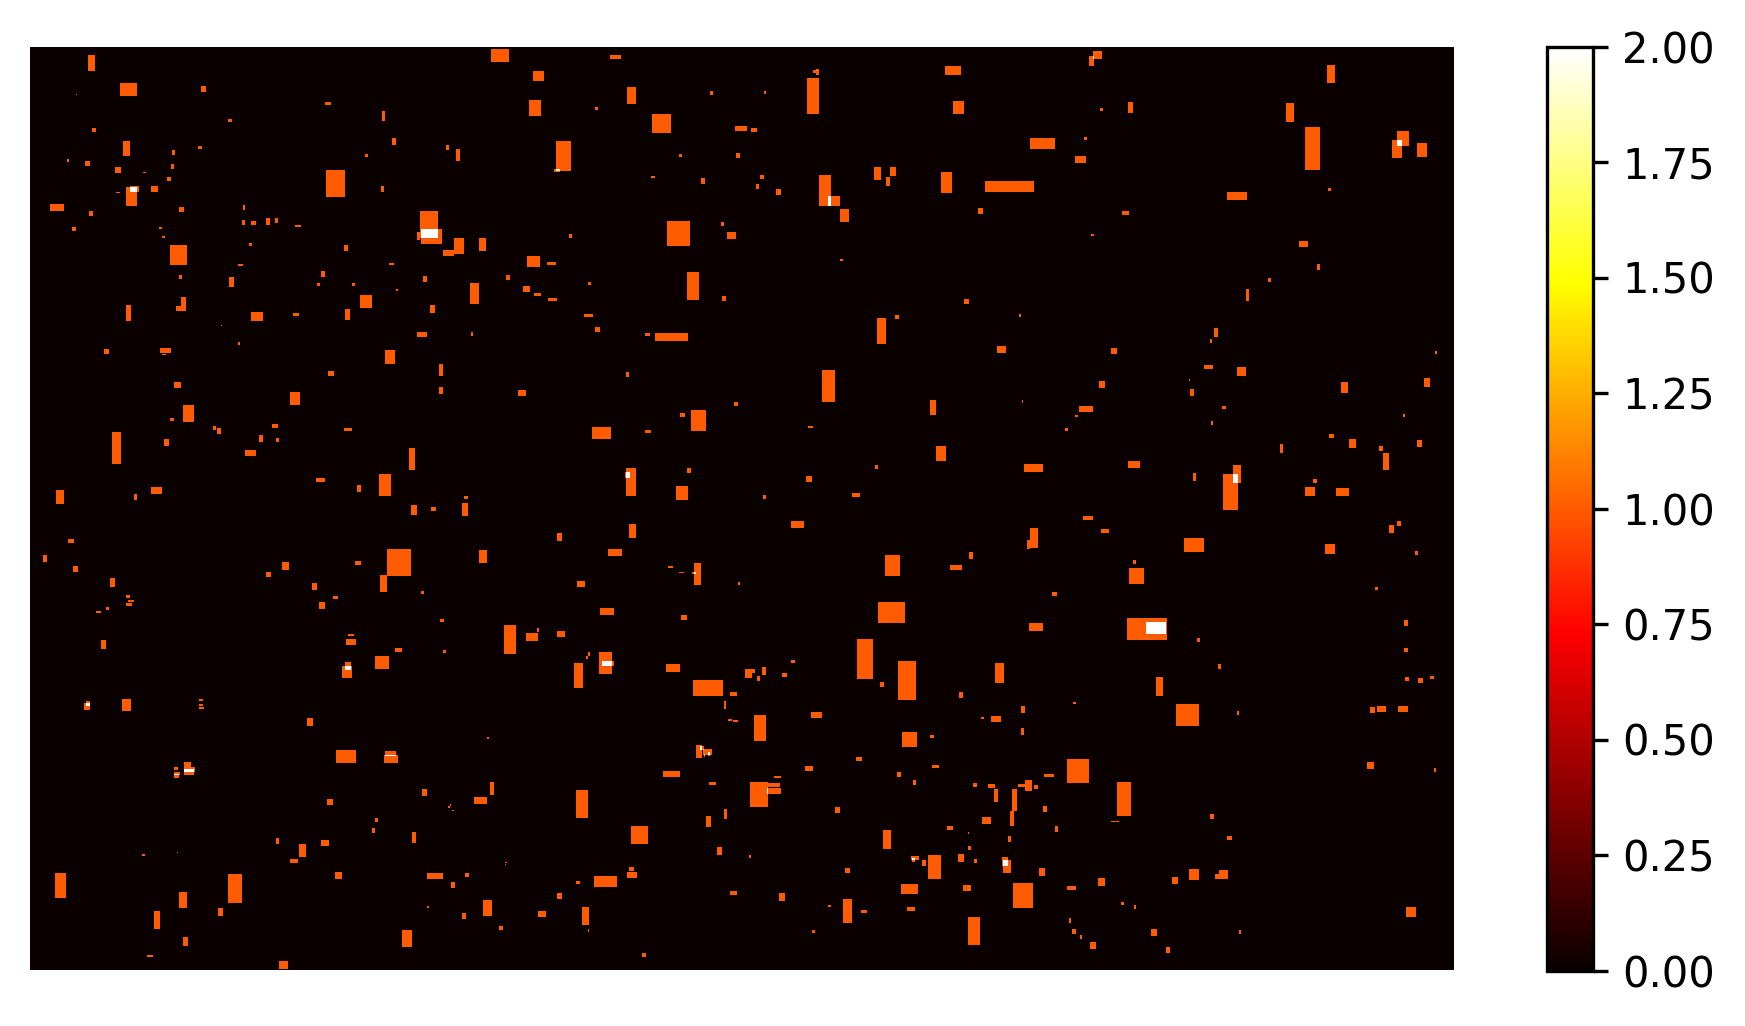

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def create_heatmap(bboxes, heatmap_size=(1000, 1000)):
    """
    Create a heatmap from a list of bounding boxes.

    Args:
        bboxes (list): List of bounding boxes. Each bounding box is a list of four floats [x, y, width, height].
        heatmap_size (tuple): Size of the heatmap. Default is (1000, 1000).

    Returns:
        None
    """
    heatmap = np.zeros(heatmap_size)

    for bbox in bboxes:
        x, y, width, height = map(int, bbox)
        heatmap[y:y+height, x:x+width] += 1

    plt.figure(figsize=(8,4), dpi=300)
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.axis(False)
    # add colorbar
    plt.colorbar()
    
    plt.show()


create_heatmap(bboxes, heatmap_size=(max(heights), max(widths)))


In [40]:
# print the average dimension of the bbox, it scales with the image size
print('Mean width: ', sum([x[2] for x in bboxes])/len(bboxes))
print('Mean height: ', sum([x[3] for x in bboxes])/len(bboxes))

Mean width:  13.597756038534547
Mean height:  15.672300653376556


In [41]:
from pathlib import Path
import pandas as pd  
import os
import argparse
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess
import shutil

In [42]:
def plot_checkpoints(workdir):
    """
    This function plots the 'coco/bbox_mAP_50' values in a given directory. It reads a JSON file named 'scalars.json',
    and plots the 'coco/bbox_mAP_50' values against the 'step' values.

    Parameters:
    workdir (str): The directory path which contains the checkpoint files and 'scalars.json'.

    Returns:
    None: The function plots the graph and doesn't return any value.
    """
    scalars = list(Path(workdir).glob('**/scalars.json'))
    title = list(Path(workdir).glob('**/*.py'))
    title = title[0].stem
    data = pd.read_json(scalars[0], lines=True)
    data = data[data['coco/bbox_mAP_50'].notna()]

    # plot all the coco/bbox_mAP values and save each one in the same folder
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@50')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_50'])
    plt.show()

    # make a plot of the mAP values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP'])
    plt.show()

    # make a plot of the mAP@75 values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@75')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_75'])
    plt.show()  
    
    
    # make a plot of mAP@50, mAP and mAP@75 in the same plot:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_50'], label='mAP@50')
    plt.plot(data['step'], data['coco/bbox_mAP'], label='mAP')
    plt.plot(data['step'], data['coco/bbox_mAP_75'], label='mAP@75')
    plt.legend()
    plt.show()

/tmp/ipykernel_267307/2535172962.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


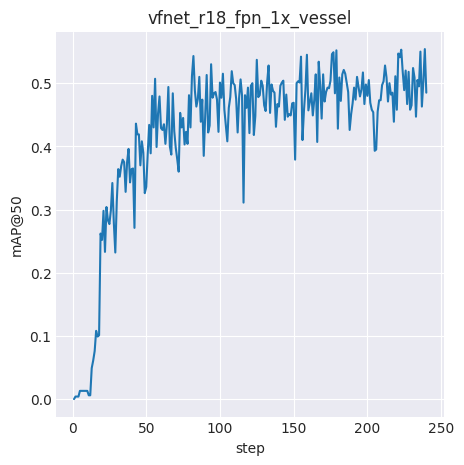

/tmp/ipykernel_267307/2535172962.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


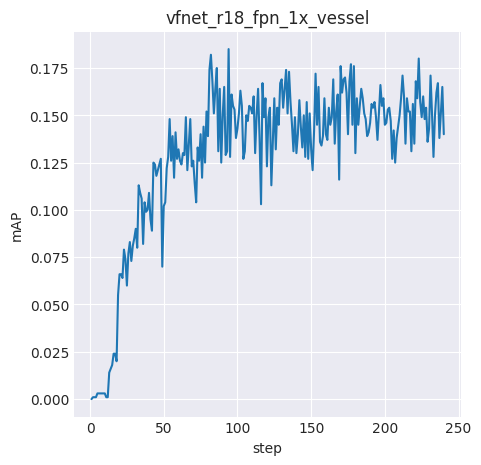

/tmp/ipykernel_267307/2535172962.py:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


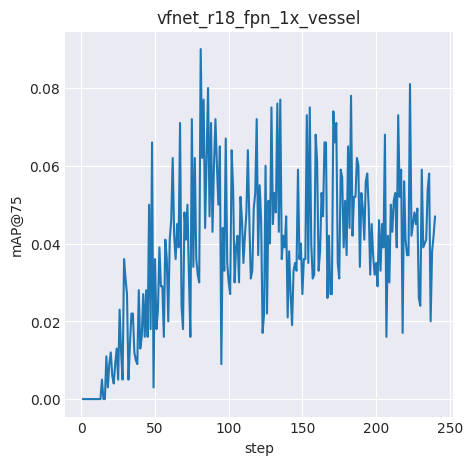

/tmp/ipykernel_267307/2535172962.py:52: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


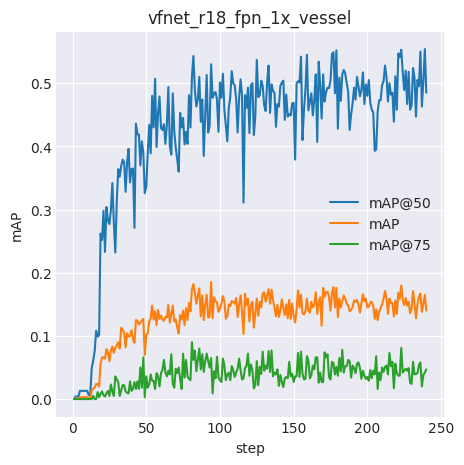

In [43]:
plot_checkpoints('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/vfnet_r18_fpn_1x_vessel/20230518_152156_0.0005')

In [ ]:
# from mmdet.apis import init_detector, inference_detector

# config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
# checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
# model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
# inference_detector(model, 'demo/demo.jpg')

In [2]:
from mmcv.transforms import LoadImageFromFile
import matplotlib.pyplot as plt
import cv2

# backend_args = dict(channel_order='bgr')
backend_args = None

loader = LoadImageFromFile(to_float32=True, color_type='color', imdecode_backend='tifffile', backend_args=backend_args)
loader

LoadImageFromFile(ignore_empty=False, to_float32=True, color_type='color', imdecode_backend='tifffile', backend_args=None)

In [3]:
from pathlib import Path  

immagini_path = Path('/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/vessels/imgs')
paths = list(immagini_path.glob('*.tif'))

medie1, medie2, medie3 = [], [], []
dev1, dev2, dev3 = [], [], []
for idx,path in enumerate(paths):

    l = loader(results={'img_path': path})
    img = l['img']
    a,b,c = img[:,:,0], img[:,:,1], img[:,:,2]


    m1, m2, m3 = a.mean(), b.mean(), c.mean()
    s1, s2, s3 = a.std(), b.std(), c.std()
    
    medie1.append(m1)
    medie2.append(m2)
    medie3.append(m3)
    
    dev1.append(s1)
    dev2.append(s2)
    dev3.append(s3)

In [4]:
import numpy as np 

print(np.mean(medie1))
print(np.mean(medie2))
print(np.mean(medie3))

print(np.mean(dev1))    
print(np.mean(dev2))
print(np.mean(dev3))



259.2189
219.64253
178.76614
52.7487
52.241676
52.754932


In [5]:
import numpy as np

def mean_without_outliers(data):
    Q1 = np.percentile(data, 20)
    Q3 = np.percentile(data, 80)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    return np.mean(filtered_data)

In [6]:
print(mean_without_outliers(medie1))
print(mean_without_outliers(medie2))
print(mean_without_outliers(medie3))
print(mean_without_outliers(dev1))    
print(mean_without_outliers(dev2))
print(mean_without_outliers(dev3))

212.40787
172.08215
130.31203
37.917152
38.06214
41.6617


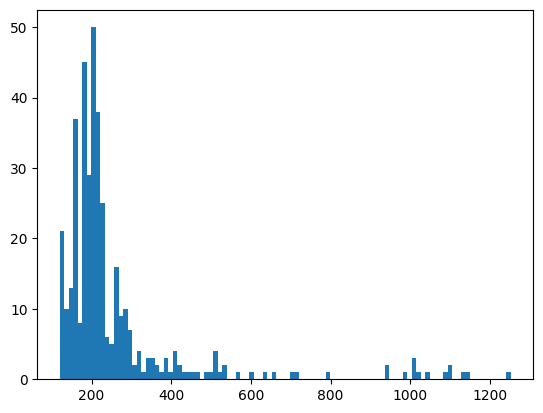

In [7]:
# make an histogram of the mean values
plt.hist(medie1, bins=100)
plt.show()

# 

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(img[:,:,2])

In [5]:
from pathlib import Path
import pandas as pd  
import os

def manage_checkpoints(workdir):
    pesi = Path(workdir).glob('*.pth')
    scalars = list(Path(workdir).glob('**/scalars.json'))

    data = pd.read_json(scalars[0], lines=True)
    try:
        row = data[data['coco/bbox_mAP_50'] == data['coco/bbox_mAP_50'].max()]
        step, value = row['step'].values[0], row['coco/bbox_mAP_50'].values[0]
        print("step value")
        print(step, value)

        print(list(pesi))

        for p in pesi:
            nome = p.name
            print(nome)
            if nome != f'epoch_{step}.pth':
                # delete the file:
                print(f"Deleting {p}")
                os.remove(p)
    except KeyError:
        print("KeyError")
        for p in pesi:
            os.remove(p)
        
# Call the function with the directory path



In [6]:
folders=["/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005"]

for folder in folders:
    manage_checkpoints(folder)

104 0.533
104 0.533
[PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_57.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_38.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_86.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_121.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_101.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_90.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_23.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_61.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230516_055811_0.0005/epoch_81.pth'), PosixPath('/home/roberto/PythonProjects/S2RAWVesse

In [ ]:
# make a plot of the mAP@50 values:
data = data[data['coco/bbox_mAP_50'].notna()]
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP@50')
plt.plot(data['step'], data['coco/bbox_mAP_50'])
plt.show()

# make a plot of the mAP values:
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP')
plt.plot(data['step'], data['coco/bbox_mAP'])
plt.show()

# make a plot of the mAP@75 values:
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP@75')
plt.plot(data['step'], data['coco/bbox_mAP_75'])
plt.show()  

In [ ]:
data

# filter data when coco/bbox_mAP_50 is none:
data = data[data['coco/bbox_mAP_50'].notna()]
data

In [ ]:
a = ["/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_094247","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_095528","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_095528","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_100835", "/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_104839"]

In [ ]:
def plot_checkpoints(workdir):
    """
    This function plots the 'coco/bbox_mAP_50' values in a given directory. It reads a JSON file named 'scalars.json',
    and plots the 'coco/bbox_mAP_50' values against the 'step' values.

    Parameters:
    workdir (str): The directory path which contains the checkpoint files and 'scalars.json'.

    Returns:
    None: The function plots the graph and doesn't return any value.
    """
    scalars = list(Path(workdir).glob('**/scalars.json'))
    title = list(Path(workdir).glob('**/*.py'))
    title = title[0].stem
    data = pd.read_json(scalars[0], lines=True)
    # plot all the coco/bbox_mAP values and save each one in the same folder
    data = data[data['coco/bbox_mAP_50'].notna()]

    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@50')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_50'])
    plt.savefig(f'{workdir}/mAP_50.png')
    plt.show()

    # make a plot of the mAP values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP'])
    plt.savefig(f'{workdir}/mAP.png')
    plt.show()

    # make a plot of the mAP@75 values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@75')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_75'])
    plt.savefig(f'{workdir}/mAP_75.png')
    plt.show()  

In [ ]:
import os
for folder in a:
    data = plot_checkpoints(folder)